# Aprendizaje supervisado

En esta sesión veremos como implementar los distintos algoritmos de aprendizaje supervisado que hemos presentado en el fastbook. Para ello, usaremos un par de datasets de kaggle y la librería scikit-learn.

# Regresión

In [2]:
import pandas as pd
import numpy as np

rn_state = 42 # random state for reproducibility

Cargamos un dataset de kaggle ([perth-house-pries](https://www.kaggle.com/datasets/syuzai/perth-house-prices))

dedicado a la predicción de precios de casas en Boston.

In [3]:
df_houses = pd.read_csv('housing.csv')
df_houses.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


Vemos que el dataset tiene una mezcla de valores numéricos y strings.

Seguramente no todos estos datos nos serán útiles, así que eliminamos los que consideremos de poca utilidad

In [5]:
df_houses_clean = df_houses.drop(columns=['ADDRESS', 'SUBURB','NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH', 'NEAREST_SCH_RANK'])
df_houses_clean.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,565000,4,2,2.0,600,160,2003.0,18300,1800,6164,-32.115900,115.842450,0.828339
1,365000,3,2,2.0,351,139,2013.0,26900,4900,6167,-32.193470,115.859554,5.524324
2,287000,3,1,1.0,719,86,1979.0,22600,1900,6111,-32.120578,115.993579,1.649178
3,255000,2,1,2.0,651,59,1953.0,17900,3600,6056,-31.900547,116.038009,1.571401
4,325000,4,1,2.0,466,131,1998.0,11200,2000,6054,-31.885790,115.947780,1.514922


Ahora comprobamos si hay algún campo con valores nan, y planteamos cómo limpiar estos valores

In [7]:
for columns in df_houses_clean.columns:
    print(columns, df_houses_clean[columns].isnull().sum()*100/len(df_houses_clean))

PRICE 0.0
BEDROOMS 0.0
BATHROOMS 0.0
GARAGE 7.362728785357737
LAND_AREA 0.0
FLOOR_AREA 0.0
BUILD_YEAR 9.374257190396957
CBD_DIST 0.0
NEAREST_STN_DIST 0.0
POSTCODE 0.0
LATITUDE 0.0
LONGITUDE 0.0
NEAREST_SCH_DIST 0.0


Podemos suponer que los pisos sin garage puedan ser nan, por lo que lo comprobamos.

In [8]:
df_houses_clean['GARAGE'].value_counts(dropna=False)

GARAGE
2.0     20724
1.0      5290
NaN      2478
3.0      2042
4.0      1949
6.0       466
5.0       362
8.0       129
7.0        97
12.0       30
10.0       26
9.0        17
14.0       13
13.0        8
11.0        7
16.0        4
18.0        3
20.0        3
32.0        1
17.0        1
21.0        1
99.0        1
26.0        1
22.0        1
50.0        1
31.0        1
Name: count, dtype: int64

Vemos datos extraños (¿casas con 99 garajes?) Esto nos puede indicar que este dataset no es muy fiable, pero para el uso que queremos darle nos valdrá.

Por otro lado, podemos confirmar que los valores nan de garage son los que no tienen garage. Por lo que podemos convertir a 0.

In [10]:
df_houses_clean['GARAGE'] = df_houses_clean['GARAGE'].fillna(0)
df_houses_clean = df_houses_clean.dropna()

Con los datos limpios, podemos dividirlos en train y test (Validación).

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_houses_clean.drop(columns=['PRICE']),
    df_houses_clean['PRICE'],
    test_size=0.2,
    random_state=rn_state)

## Regresión lineal

Con nuestros datos limpios, podemos empezar a modelar.

Para utilizar modelos clásicos, usaremos la librería scikit-learn. Esta librería tiene una interfaz muy sencilla, y es muy fácil de usar.
https://scikit-learn.org/stable/

Es comúnmente usada y veremos que el uso de sus modelos es bastante estandarizado.
Por lo general necesitaremos:
- Cargar el modelo
- Hacer fit() con los datos de entrenamiento
- Comprobar el score con los datos de test
- Utilizarlo con predict()

In [12]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor = regressor.fit(X_train, y_train)

Con esto hemos entrenado un modelo, ahora podríamos simplemente utilizarlo para predecir el precio de una casa.

In [14]:
# entrada: BEDROOMS, BATHROOMS, GARAGE, LAND_AREA, FLOOR_AREA, BUILD_YEAR, CBD_DIST, NEAREST_STN_DIST, POSTCODE, LATITUDE, LONGITUDE, NEAREST_SCH_DIST
example_data = [[4, 2, 2.0,	600, 160, 2003.0, 18300, 1800, 6164, -32.115900, 115.842450, 0.828339]]
prediction = regressor.predict(example_data)
print(prediction)

[539539.50443624]


/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Podemos incluso analizar los componenetes del modelo de regresión lineal, que si recordamos, es una combinación lineal de los datos de entrada.
Los dos componenetes principales son el interceptor y los pesos

In [16]:
interceptor = regressor.intercept_
weights = regressor.coef_
print(interceptor)
print(weights)

115765308.97235169
[-1.30193490e+04  1.02576192e+05  1.08292802e+04  1.45423508e+00
  2.37943526e+03 -3.92924316e+03 -1.44208707e+01  1.64252246e+01
 -7.75242959e+02 -3.81428679e+05 -9.94120245e+05  1.51174948e+04]


Pero como evaluamos lo bien o mal que lo hace el modelo? Podemos usar el score, pero qué significa?
El score en regresión lineal es el R2, que nos indica la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes.

In [17]:
score = regressor.score(X_train, y_train)
print('R^2 del modelo: %.2f'% score)

R^2 del modelo: 0.58


Desde el punto de vista estadístico R2 es la métrica que más claramente nos muestra la relación entre entrada y salida, pero no nos indica tanto el error.

Para saber el error absoluto medio (MAE), que nos indica la media de los errores absolutos o el error podemos usar la del error cuadrático medio (MSE), que nos indica la media de los errores al cuadrado.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

y_predicted = regressor.predict(X_train)
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted))
print('Mean squared error: %.2f' % mean_squared_error(y_train, y_predicted))

Mean absolute error: 157208.94
Mean squared error: 53811827908.22


El error medio absoluto es alto, pero razonable.

Pero ese squared error es enorme! 

¿A qué se debe? MSE no está en dolares, sino el dolares cuadrados. Por ello es común usar la raiz de este error, ya que representa el error en la misma unidad que la variable dependiente.

In [21]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted)))

Mean absolute error: 157208.94
Root Mean squared error: 231973.77


Si los errores son correctos, deberíamos poder ver una varianza entre lo predicho y lo real de alrededor de 100.000 - 200.000 dolares.

In [23]:
for predicted, actual in zip(y_predicted[:10], y_train[:10]):
    print(f'predicted: {predicted:.2f}, actual: {actual:.2f}, difference: {abs(predicted - actual):.2f}')

predicted: 465476.68, actual: 355000.00, difference: 110476.68
predicted: 641318.04, actual: 580000.00, difference: 61318.04
predicted: 543562.10, actual: 585000.00, difference: 41437.90
predicted: 720334.46, actual: 584000.00, difference: 136334.46
predicted: 454564.05, actual: 385000.00, difference: 69564.05
predicted: 340732.81, actual: 410000.00, difference: 69267.19
predicted: 752747.19, actual: 569400.00, difference: 183347.19
predicted: 434760.19, actual: 255000.00, difference: 179760.19
predicted: 583663.82, actual: 530000.00, difference: 53663.82
predicted: 1058832.84, actual: 1100000.00, difference: 41167.16


Los errores parecen corresponderse a cifras con sentido, pero puede que haya varias cifras con errores muy grandes

In [25]:
counter = 0
for predicted, actual in zip(y_predicted, y_train):
    if np.absolute(actual - predicted) > 1_000_000:
        counter += 1
        print(f'big error predicted: {predicted:.2f}, actual: {actual:.2f}')
        if counter > 10:
            break

big error predicted: 1114309.19, actual: 2410000.00
big error predicted: 1333835.15, actual: 2437000.00
big error predicted: 1286202.06, actual: 85000.00
big error predicted: 1343774.06, actual: 2400000.00
big error predicted: 1164967.77, actual: 2400000.00
big error predicted: 179157.40, actual: 1440000.00
big error predicted: -411193.30, actual: 658500.00
big error predicted: 827452.59, actual: 1920000.00
big error predicted: 902728.99, actual: 2425000.00
big error predicted: 1217302.47, actual: 190000.00
big error predicted: 1249917.70, actual: 2300000.00


Los errores más grandes se acercan a lo estimado por el RMSE. Por lo que es un error que nos indicará mejor por cuanto se equivoca el modelo en el peor de los casos.

Aún podemos hacer algo mejor e intentar estimar en qué casos el modelo es más propenso a equivocarse.

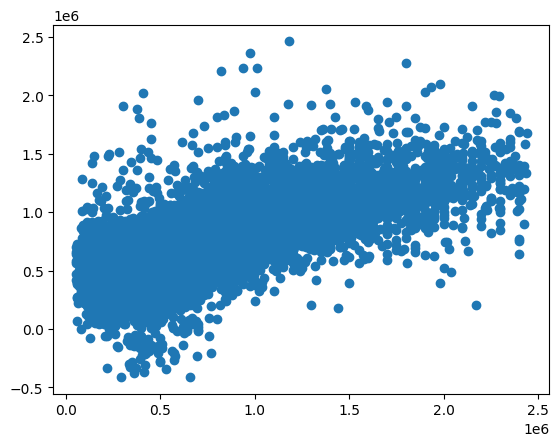

In [26]:
from matplotlib import pyplot as plt
plt.scatter(y_train, y_predicted)
plt.show()

Aquí podemos ver que a precios bajos, nuestro modelo puede dar valores negativos, y que hay un ligero incremento de precisión a medida que aumenta el precio (Aunque muy ligero). Por lo general las métricas se van a mantener a lo largo de todo el rango de precios.

Por ahora hemos evaluado los resultados de entrenamiento, pero realmente lo que nos interesa es el resultado de test. Estos son datos que el modelo desconoce, y por lo tanto, nos darán una mejor idea de cómo se comportará el modelo en el mundo real.

In [28]:
y_predicted_train = regressor.predict(X_train)
print('Train Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted_train))
print('Train Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted_train)))

y_predicted = regressor.predict(X_test)
print('Test Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predicted))
print('Test Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_predicted)))

Train Mean absolute error: 157208.94
Train Mean squared error: 231973.77
Test Mean absolute error: 153040.91
Test Mean squared error: 226091.98


Vemos que los resultados son similares, por lo que podemos estar seguros de que el modelo no está sobreajustado.

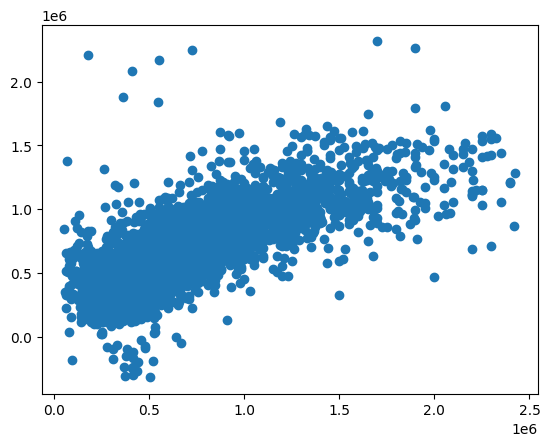

In [29]:
plt.scatter(y_test, y_predicted)
plt.show()

Incluso en la gráfica vemos un comportamiento similar

## Modelo LASSO

En regresión lineal nos hemos parado más en cómo evaluar un modelo de regresión, que en el modelo en sí. Ahora vamos a ver un modelo de regresión lineal regularizado, LASSO.

Vamos a ver que los pasos son similares sino idénticos a los de regresión lineal.

Cargamos el modelo y lo entrenamos

In [31]:
lasso = linear_model.Lasso(alpha=0.1)
lasso = lasso.fit(X_train, y_train)


Este modelo ya podemos usarlo para hacer nuevas predicciones

In [32]:
# entrada: BEDROOMS, BATHROOMS, GARAGE, LAND_AREA, FLOOR_AREA, BUILD_YEAR, CBD_DIST, NEAREST_STN_DIST, POSTCODE, LATITUDE, LONGITUDE, NEAREST_SCH_DIST
example_data = [[4, 2, 2.0,	600, 160, 2003.0, 18300, 1800, 6164, -32.115900, 115.842450, 0.828339]]
prediction = lasso.predict(example_data)
print(prediction)

[539539.29583681]


/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Podemos calcular sus métricas de la misma forma

In [33]:
y_predicted = lasso.predict(X_train)
print('Mean absolute error: %.2f' % mean_absolute_error(y_train, y_predicted))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_train, y_predicted)))

Mean absolute error: 157208.82
Root Mean squared error: 231973.77


Y podemos visualizarlo igual

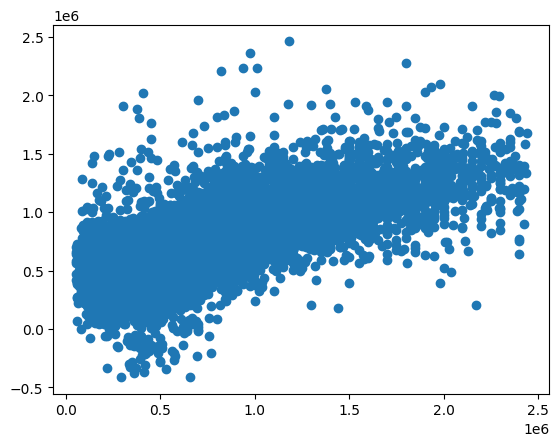

In [34]:
plt.scatter(y_train, y_predicted)
plt.show()

Igual en test

In [35]:
y_predicted = lasso.predict(X_test)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_predicted))
print('Root Mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_predicted)))

Mean absolute error: 153040.77
Root Mean squared error: 226091.93


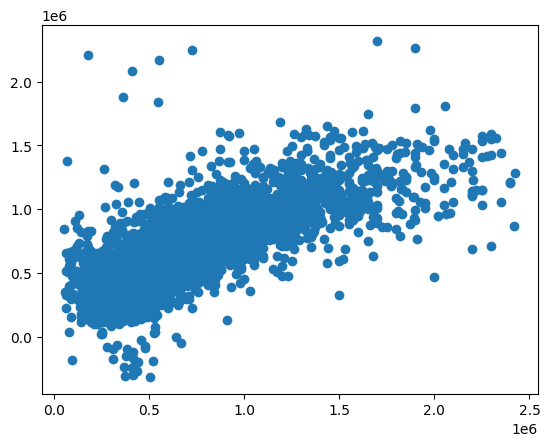

In [36]:
plt.scatter(y_test, y_predicted)
plt.show()

Con esto, podemos ver cómo evaluar y comparar modelos de regresión. Podemos expandir esta idea a cualquier modelo de regresión e incluso podemos usar sus librerías para modificarlos.

# Clasificación

Para clasificación empezaremos con un dataset sencillo, [iris](https://www.kaggle.com/datasets/uciml/iris)

Un dataset dedicado a la clasificación de flores de iris. Según características como el tamaño de los pétalos, el tamaño de los sépalos, etc.

In [37]:
df_iris = pd.read_csv('IRIS.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df_iris['species'].value_counts(dropna=False)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Este dataset ya está limpio, por lo que tan sólo necesitamos dividirlo en train y test.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df_iris.drop(columns=['species']), 
    df_iris['species'], 
    test_size=0.2, 
    random_state=rn_state)

## Árboles de decisión

Empezaremos estudiando los árboles de decisión, que son un modelo muy sencillo de entender y que nos permitirá ver cómo se comportan los modelos de clasificación.
Una vez más usaremos la librería de scikit-learn. Y veremos que el uso de los modelos es igual.

In [41]:
from sklearn import tree 

DT = tree.DecisionTreeClassifier(random_state=rn_state)
DT.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Y podemos usarlo de la misma forma

In [43]:
# entrada: sepal_length, sepal_width, petal_length, petal_width
example_data = [[5.1, 3.5, 1.4, 0.2]]
prediction = DT.predict(example_data)
print(prediction)

['Iris-setosa']


/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


El score en este caso será el accuracy del modelo, que es una de las métricas que habíamos visto de interés

In [45]:
print('Accuracy en entrenamiento %.2f'%DT.score(X_train, y_train))
print('Accuracy en test %.2f'%DT.score(X_test, y_test))

Accuracy en entrenamiento 1.00
Accuracy en test 1.00


Tenemos un accuracy perfecto tanto en entrenamiento como en test, por lo que hasta donde sabemos nuestro modelo no comete fallos (En realidad podemos determinar que no tenemos datos suficientes como para sabe ren qué puntos nuestro modelo falla)

Una ventaja de los árboles de decisión es que podemos visualizarlos

[Text(0.3076923076923077, 0.9285714285714286, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal_length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal_width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal_width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = Iris-virginica'),
 Text(0.38461538461538464, 0.5, 'petal_length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]

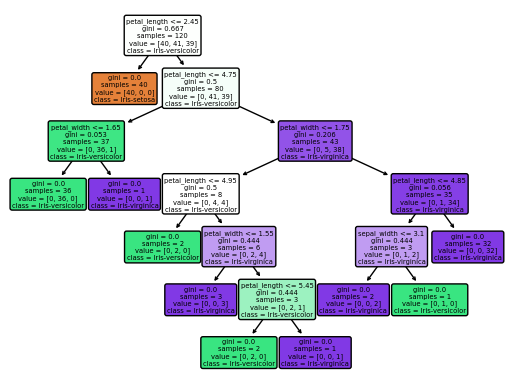

In [47]:
tree.plot_tree(DT,
               feature_names=X_train.columns,
               class_names=df_iris['species'].unique(),
               filled=True,
               rounded=True)

Para ver casos más complejos, veamos otro dataset.

[dataset titanic](https://www.kaggle.com/datasets/heptapod/titanic)

Dedicado a información sobre los pasajeros del titanic, como su edad, sexo, clase, etc. Y si sobrevivieron o no.

In [49]:
df_titanic = pd.read_excel('Titanic_dataset.xlsx')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
df_titanic['survived'].value_counts(dropna=False)

survived
0    809
1    500
Name: count, dtype: int64

Suponemos que 1 equivale a superviviente y 0 a no superviviente

Limpiamos los datos que no creemos que sean útiles Y transformamos los datos de tipo string en numéricos

In [53]:
df_titanic_clean = df_titanic.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
df_titanic_clean['sex'] = pd.factorize(df_titanic_clean['sex'])[0]
df_titanic_clean['embarked'] = pd.factorize(df_titanic_clean['embarked'])[0]
df_titanic_clean.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,0
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0
3,1,0,1,30.0000,1,2,151.5500,0
4,1,0,0,25.0000,1,2,151.5500,0


In [55]:
for column in df_titanic_clean.columns:
    print(column, df_titanic_clean[column].isnull().sum()*100/len(df_titanic_clean))

pclass 0.0
survived 0.0
sex 0.0
age 20.091673032849503
sibsp 0.0
parch 0.0
fare 0.07639419404125286
embarked 0.0


In [56]:
df_titanic_clean['age'] = df_titanic_clean['age'].fillna(df_titanic_clean['age'].mean())
df_titanic_clean['fare'] = df_titanic_clean['fare'].fillna(df_titanic_clean['fare'].mean())

Dividimos los datos en entrenamiento y test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic_clean.drop(columns=['survived']),
    df_titanic_clean['survived'], 
    test_size=0.2, 
    random_state=rn_state)

In [59]:
DT = tree.DecisionTreeClassifier(random_state=rn_state)
DT = DT.fit(X_train, y_train)
print('train accuracy: %.2f' % DT.score(X_train, y_train))
print('test accuracy: %.2f' % DT.score(X_test, y_test))

train accuracy: 0.97
test accuracy: 0.79


Ahora sí vemos que nuestro accuracy no es perfecto, pero no sabemos en qué fallamos. Para ello podemos usar las otras métricas que hemos visto

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_predicted = DT.predict(X_test)
print('precision: %.2f' % precision_score(y_test, y_predicted))
print('recall: %.2f' % recall_score(y_test, y_predicted))
print('f1: %.2f' % f1_score(y_test, y_predicted))

precision: 0.81
recall: 0.71
f1: 0.76


Vemos una precisión alta pero un recall bajo
Lo que nos indica que no siempre detectamos a los supervivientes, pero cuando lo hacemos, es muy probable que sea un superviviente.

Otra forma de visualizarlo es con una matriz de confusión

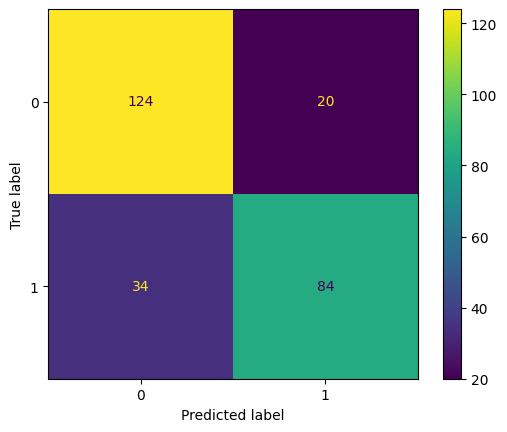

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predicted, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot()
plt.show()

De aquí vemos que cuando hay superviviente (True label 1) hay casi un 50% posibilidades de que lo detectemos.
Pero cuando el modelo da una respuesta, tenemos una posibilidad grande de haber acertado.

Predicted label 0: 72%

Predicted label 1: 82%

Esto se debe a la desproporción superviviente/no superviviente

[Text(0.3231313694788757, 0.9772727272727273, 'sex <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]\nclass = Not survived'),
 Text(0.1618802374301676, 0.9318181818181818, 'pclass <= 2.5\ngini = 0.409\nsamples = 370\nvalue = [106, 264]\nclass = Survived'),
 Text(0.06983240223463687, 0.8863636363636364, 'fare <= 32.09\ngini = 0.124\nsamples = 195\nvalue = [13, 182]\nclass = Survived'),
 Text(0.05865921787709497, 0.8409090909090909, 'fare <= 31.34\ngini = 0.223\nsamples = 86\nvalue = [11, 75]\nclass = Survived'),
 Text(0.05307262569832402, 0.7954545454545454, 'age <= 59.0\ngini = 0.208\nsamples = 85\nvalue = [10, 75]\nclass = Survived'),
 Text(0.04189944134078212, 0.75, 'parch <= 1.5\ngini = 0.193\nsamples = 83\nvalue = [9, 74]\nclass = Survived'),
 Text(0.036312849162011177, 0.7045454545454546, 'fare <= 12.675\ngini = 0.216\nsamples = 73\nvalue = [9, 64]\nclass = Survived'),
 Text(0.030726256983240222, 0.6590909090909091, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Survived

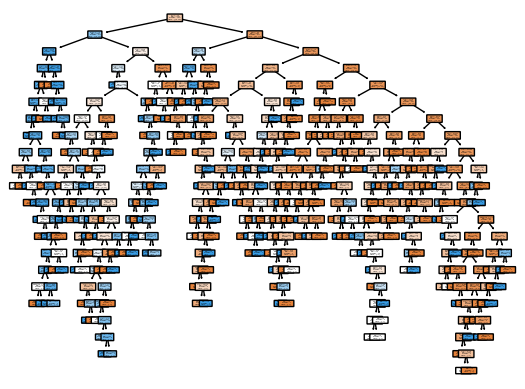

In [64]:
tree.plot_tree(DT,
               feature_names=X_train.columns,
               class_names=['Not survived', 'Survived'],
               filled=True,
               rounded=True)

Decision trees nos dan muchas posibilidades de mejorar sus resultados, trabajando con sus hiperparámetros

In [65]:
# Aumenta el número de muestras mínimas para continuar un nodo
DT = tree.DecisionTreeClassifier(random_state=rn_state, min_samples_leaf=10)
DT = DT.fit(X_train, y_train)
print('test accuracy: %.2f' % DT.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.77
test precision: 0.81
test recall: 0.71
test f1: 0.76


[Text(0.3035126879699248, 0.9615384615384616, 'sex <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]\nclass = Not survived'),
 Text(0.18045112781954886, 0.8846153846153846, 'pclass <= 2.5\ngini = 0.409\nsamples = 370\nvalue = [106, 264]\nclass = Survived'),
 Text(0.12030075187969924, 0.8076923076923077, 'fare <= 32.09\ngini = 0.124\nsamples = 195\nvalue = [13, 182]\nclass = Survived'),
 Text(0.09022556390977443, 0.7307692307692307, 'parch <= 1.5\ngini = 0.223\nsamples = 86\nvalue = [11, 75]\nclass = Survived'),
 Text(0.07518796992481203, 0.6538461538461539, 'age <= 35.5\ngini = 0.248\nsamples = 76\nvalue = [11, 65]\nclass = Survived'),
 Text(0.045112781954887216, 0.5769230769230769, 'age <= 29.441\ngini = 0.204\nsamples = 52\nvalue = [6, 46]\nclass = Survived'),
 Text(0.03007518796992481, 0.5, 'fare <= 22.0\ngini = 0.266\nsamples = 38\nvalue = [6, 32]\nclass = Survived'),
 Text(0.015037593984962405, 0.4230769230769231, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = Surviv

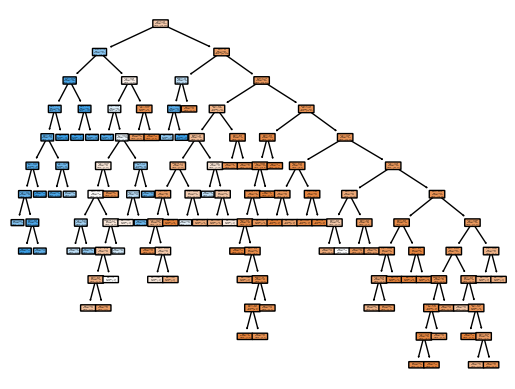

In [66]:
tree.plot_tree(DT,
               feature_names=X_train.columns,
               class_names=['Not survived', 'Survived'],
               filled=True,
               rounded=True)

O limitando su profundidad

In [67]:
DT = tree.DecisionTreeClassifier(random_state=rn_state, max_depth=3)
DT = DT.fit(X_train, y_train)
print('test accuracy: %.2f' % DT.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.78
test precision: 0.81
test recall: 0.71
test f1: 0.76


[Text(0.5, 0.875, 'sex <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]\nclass = Not survived'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.409\nsamples = 370\nvalue = [106, 264]\nclass = Survived'),
 Text(0.125, 0.375, 'fare <= 32.09\ngini = 0.124\nsamples = 195\nvalue = [13, 182]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.223\nsamples = 86\nvalue = [11, 75]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.036\nsamples = 109\nvalue = [2, 107]\nclass = Survived'),
 Text(0.375, 0.375, 'fare <= 23.35\ngini = 0.498\nsamples = 175\nvalue = [93, 82]\nclass = Not survived'),
 Text(0.3125, 0.125, 'gini = 0.495\nsamples = 144\nvalue = [65, 79]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.175\nsamples = 31\nvalue = [28, 3]\nclass = Not survived'),
 Text(0.75, 0.625, 'age <= 9.5\ngini = 0.288\nsamples = 677\nvalue = [559, 118]\nclass = Not survived'),
 Text(0.625, 0.375, 'sibsp <= 2.5\ngini = 0.48\nsamples = 35\nvalue = [14, 21]\nclass = Survived'),
 Text(0.5625, 0.12

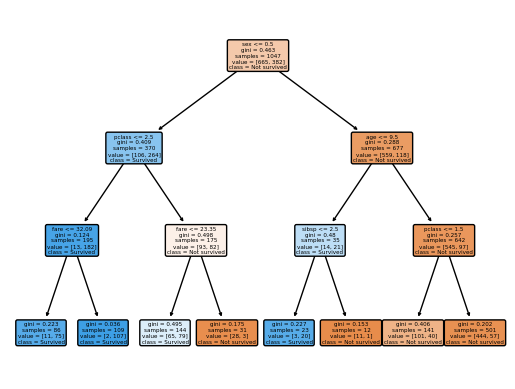

In [69]:
tree.plot_tree(DT,
               feature_names=X_train.columns,
               class_names=['Not survived', 'Survived'],
               filled=True,
               rounded=True)

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=rn_state)
random_forest = random_forest.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.79
test precision: 0.81
test recall: 0.71
test f1: 0.76


Vemos una mejora notable contra arboles de decisión. Y esto se debe a que random forest combina varios arboles de decisión, por defecto 100

In [72]:
len(random_forest.estimators_)

100

Y podemos observar cada árbol y ver como cada uno empieza a especializarse en un tipo de dato

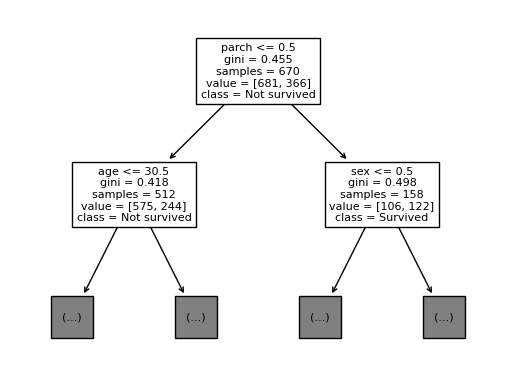

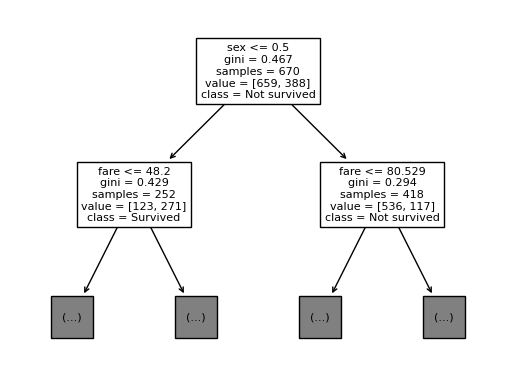

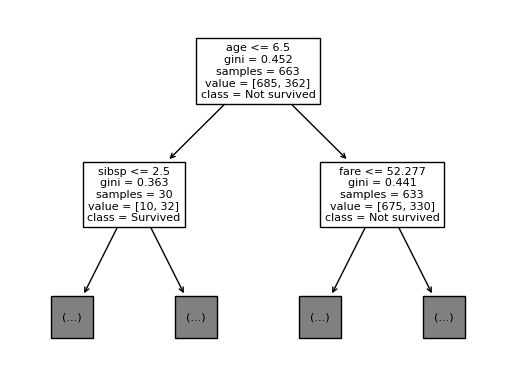

In [74]:
for decision_tree in random_forest.estimators_[:3]:
    tree.plot_tree(decision_tree,
                    feature_names=X_train.columns,
                    class_names=['Not survived', 'Survived'],
                    max_depth=1)
    plt.show()

Esto es el efecto de bootstrap

## SVM

Dejando atrás a los modelos de ensemble, podemos pasar a los support vector machine. Que una vez más se cargan y entrenan de forma similar

In [76]:
from sklearn.svm import SVC
svc = SVC(random_state=rn_state, kernel='linear')
svc = svc.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.79
test precision: 0.81
test recall: 0.71
test f1: 0.76


Podemos ver un mapa de svc, pero necesitamos usar sólo dos dimensiones

In [77]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


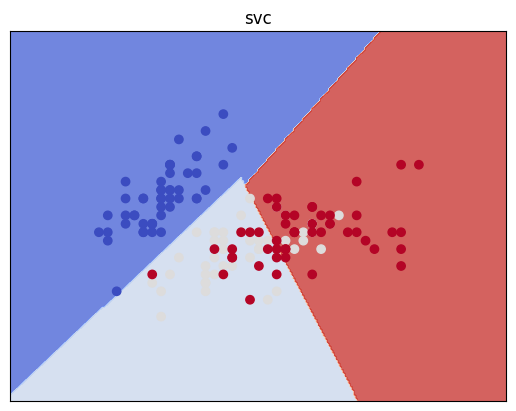

In [78]:
df_iris = pd.read_csv('IRIS.csv')
X = np.array(df_iris)[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = np.array(pd.factorize(df_iris['species'])[0])
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# title for the plots
titles = 'SVC'
svc = SVC(random_state=rn_state, kernel='linear')
svc = svc.fit(X, y)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("svc")

plt.show()

Podemos ver la dificultad de separar estos datos a base de un hiperplano.

Por lo que posiblemente, SVM no es el mejor modelo para resolver este problema

## Logistic regression

Logistic regression es posiblemente el único modelo que no se usa habitualmente para clasificación, sino como parte de un modelo de deep learning. Vereis su uso real más adelante.

Pero esto no impide que scikit-learn tenga una implementación que podemos probar

In [79]:
logistic_regressor = linear_model.LogisticRegression(random_state=rn_state)
logistic_regressor = logistic_regressor.fit(X_train, y_train)
print('test accuracy: %.2f' % random_forest.score(X_test, y_test))
print('test precision: %.2f' % precision_score(y_test, y_predicted))
print('test recall: %.2f' % recall_score(y_test, y_predicted))
print('test f1: %.2f' % f1_score(y_test, y_predicted))

test accuracy: 0.79
test precision: 0.81
test recall: 0.71
test f1: 0.76


Para entender qué está pasando vemos cómo el modelo funcionaría con una variable

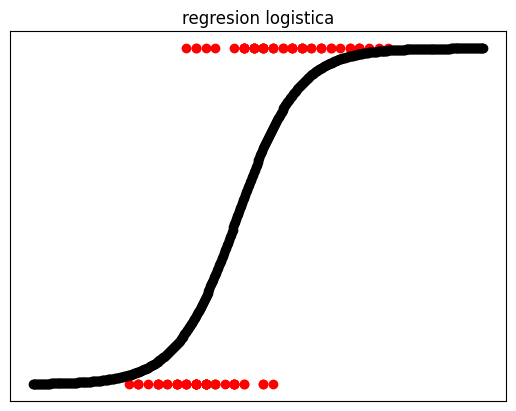

In [80]:
from scipy.special import expit # sigmoid classifier forces a class, so we must use the sigmoid function
df_iris = pd.read_csv('IRIS.csv')
df_iris = df_iris[df_iris['species'].isin(['Iris-setosa', 'Iris-versicolor'])]
X = np.array(df_iris)[:, :1]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y_train = np.array(pd.factorize(df_iris['species'])[0])

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
h=0.01
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# title for the plots
titles = 'Logistic Regressor'
logistic_regressor = linear_model.LogisticRegression(random_state=rn_state)
logistic_regressor = logistic_regressor.fit(X, y_train)

Z = np.arange(x_min, x_max, h).reshape(-1, 1) * logistic_regressor.coef_ + logistic_regressor.intercept_
Z = expit(Z)

# Plot also the training points
plt.scatter(X, y_train, c='red')
plt.scatter(np.arange(x_min, x_max, h), Z, c='black')
plt.xticks(())
plt.yticks(())
plt.title("regresion logistica")

plt.show()

# Conclusiones

En esta sección, hemos estudiado: 

- Los dos tipos de aprendizaje supervisado: regresión y clasificación

- Dentro de clasificación hemos visto modelos de tipo árbol, ensemble, SVM y regresión logística

- Dentro de regresión hemos visto regresión lineal y LASSO.
  
- Hemos visto cómo evaluar los modelos y cómo compararlos. 

De aquí en adelante, podremos resolver cualquier problema que correspondan a datos tabulados, ya sea para poder generar un modelo productivo como un análisis detallado de los datos. 